In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import set_printoptions
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../input/world-happiness/2016.csv')
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.shape

(157, 13)

In [3]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [5]:
df_num = df.select_dtypes(exclude = 'object')
df_cat = df.select_dtypes(include = 'object')

In [6]:
df_num.shape

(157, 11)

In [7]:
df_num.head(5)

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [8]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


In [9]:
df_num.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

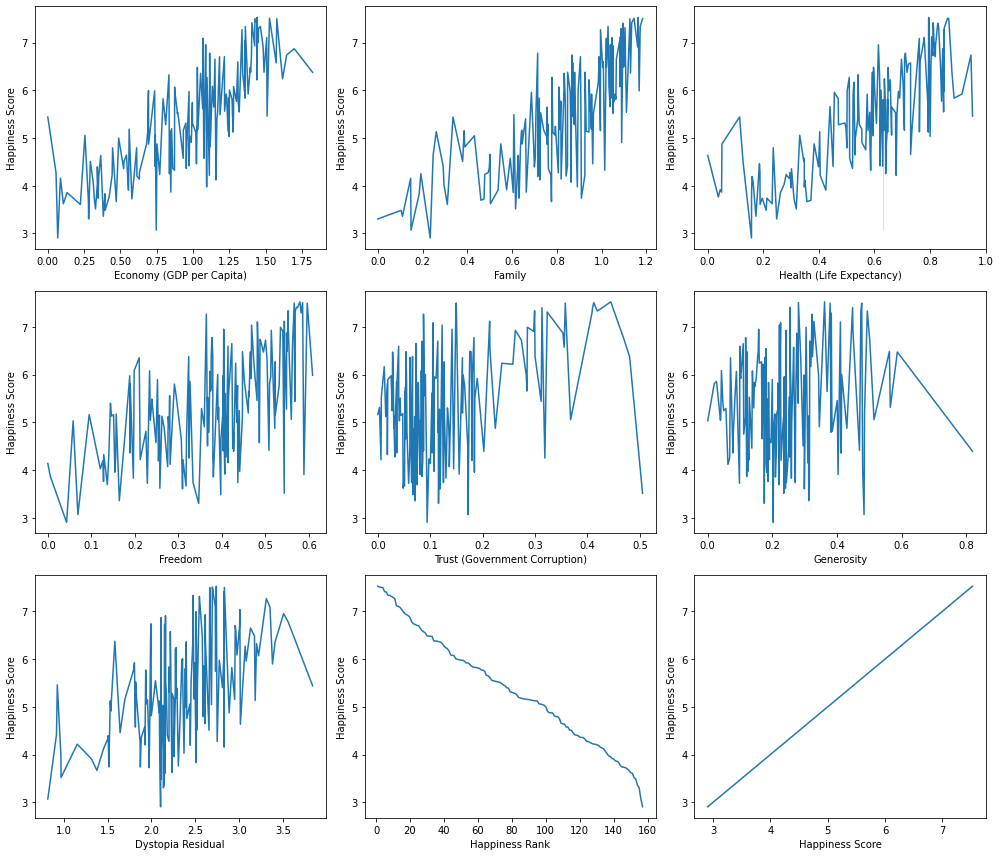

In [10]:
# Bar Plot

fig, axis = plt.subplots(3,3 , figsize = (14,12))

sns.lineplot(ax = axis[0,0] ,x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = df_num)
sns.lineplot(ax = axis[0,1] ,x = 'Family', y = 'Happiness Score', data = df_num)
sns.lineplot(ax = axis[0,2] ,x = 'Health (Life Expectancy)', y = 'Happiness Score', data = df_num)
sns.lineplot(ax = axis[1,0] ,x = 'Freedom', y = 'Happiness Score', data = df_num)
sns.lineplot(ax = axis[1,1] ,x = 'Trust (Government Corruption)', y = 'Happiness Score', data = df_num)
sns.lineplot(ax = axis[1,2] ,x = 'Generosity', y = 'Happiness Score', data = df_num)
sns.lineplot(ax = axis[2,0] ,x = 'Dystopia Residual', y = 'Happiness Score', data = df_num)
sns.lineplot(ax = axis[2,1] ,x = 'Happiness Rank', y = 'Happiness Score', data = df_num)
sns.lineplot(ax = axis[2,2] ,x = 'Happiness Score', y = 'Happiness Score', data = df_num)
plt.tight_layout()
plt.show

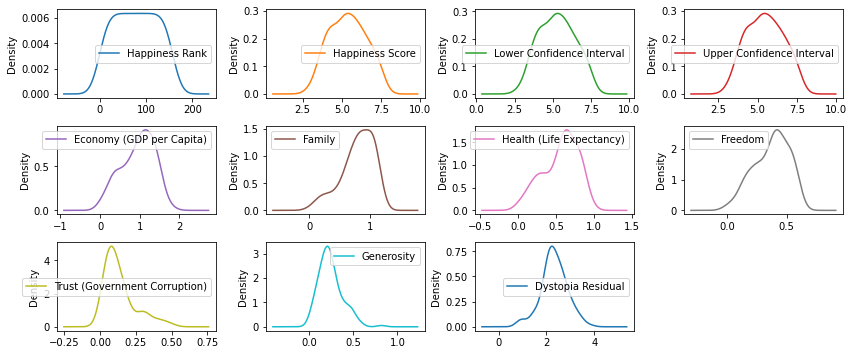

In [11]:
df_num.plot(kind = 'density', subplots = True, layout = (3,4) ,figsize = (12,5), sharex = False)
plt.tight_layout()
plt.show()

<AxesSubplot:>

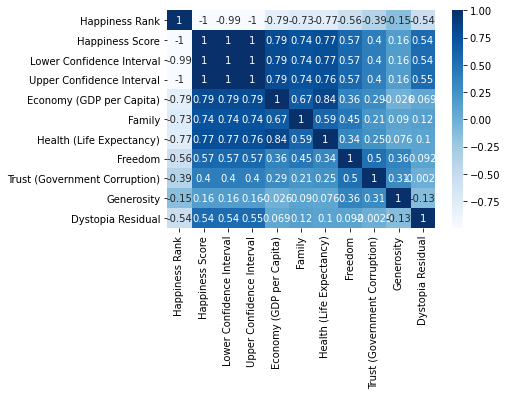

In [12]:
sns.heatmap(df_num.corr(), annot = True, cmap ='Blues')

# Categorical Data

In [13]:
df_cat.shape

(157, 2)

In [14]:
df_cat_ = df_cat['Region']

In [15]:
df_cat_ = pd.get_dummies(df_cat_)
print(df_cat_.shape)

(157, 10)


In [16]:
label_cat = df_cat.apply(LabelEncoder().fit_transform)

In [17]:
df_cate = df_cat_.join(label_cat)
df_cate.shape

(157, 12)

In [18]:
data = df_num.join(df_cate)
data.shape

(157, 23)

In [19]:
target = data.pop("Happiness Score")
data.insert(21, 'Happiness Score',target)
data.head(5)

,Happiness Rank,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe,Country,Happiness Score,Region
0,1,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,0,0,0,0,0,0,0,0,0,1,37,7.526,9
1,2,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,0,0,0,0,0,0,0,0,0,1,134,7.509,9
2,3,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,0,0,0,0,0,0,0,0,0,1,57,7.501,9
3,4,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,0,0,0,0,0,0,0,0,0,1,103,7.498,9
4,5,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,0,0,0,0,0,0,0,0,0,1,44,7.413,9


In [20]:
# Standard Scaler

array = data.values
x = array[:,:-1]
y = array[:,-1]
#scaler = Normalizer().fit(x)
scaler = StandardScaler().fit(x)
X = scaler.transform(x)
set_printoptions(precision =3)
print(X[:5,:5])

[[-1.721  1.903  1.863  1.186  1.392]
 [-1.699  1.875  1.861  1.394  1.323]
 [-1.677  1.792  1.931  1.15   1.466]
 [-1.654  1.869  1.848  1.516  1.254]
 [-1.632  1.808  1.759  1.099  1.283]]


In [21]:
#train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3, random_state = 1)

# Using Regression Algorithms

In [22]:
#Multiple Regression

model1 = LinearRegression()
model1.fit(X_train,y_train)

predict1 = model1.predict(X_test)
#result1  = predict1.score(X_test,y_test)
accuracies1 = cross_val_score(estimator = model1, X = X_test, y = y_test, cv = 10)
print(("Accuracy: %.3f%% ") % (accuracies1.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))
print(mean_absolute_error(y_test,predict1))
print(mean_squared_error(y_test,predict1))
print(np.sqrt(mean_squared_error(y_test,predict1)))

Accuracy: 99.732% 
Standard Deviation: 0.74 %
7.743805596760467e-15
7.946541024937286e-29
8.914337342134459e-15


In [23]:
# Regression model = Lasso

model2 = Lasso(alpha =1.0)
model2.fit(X_train,y_train)

predict2 = model2.predict(X_test)
results2 = model2.score(X_test,y_test)
print(results2)
accuracies2 = cross_val_score(estimator = model2, X = X_test, y = y_test, cv = 4)
print(("Accuracy: %.3f%% ") % (accuracies2.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))
print(mean_absolute_error(y_test,predict2))
print(mean_squared_error(y_test,predict2))
print(np.sqrt(mean_squared_error(y_test,predict2)))

0.5928172475369426
Accuracy: 55.328% 
Standard Deviation: 5.16 %
1.7864354173515224
3.545176221531653
1.8828638351011082


In [24]:
# Random Forest Regresion

model3 = RandomForestRegressor()
model3.fit(X_train,y_train)

predict3 = model3.predict(X_test)
results3 = model3.score(X_test,y_test)
#print(results3)
accuracies3 = cross_val_score(estimator = model3, X = X_test, y = y_test, cv = 10)
print(("Accuracy: %.3f%% ") % (accuracies3.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))
print(mean_absolute_error(y_test,predict3))
print(mean_squared_error(y_test,predict3))
print(np.sqrt(mean_squared_error(y_test,predict3)))

Accuracy: 90.635% 
Standard Deviation: 11.74 %
0.14458333333333337
0.10669166666666667
0.3266369034060093


In [25]:
# Regression model = Lasso

model4 = Lasso(alpha =1.0)
model4.fit(X_train,y_train)

predict4 = model4.predict(X_test)
results4 = model4.score(X_test,y_test)
#print(results2)
accuracies4 = cross_val_score(estimator = model4, X = X_test, y = y_test, cv = 3)
print(("Accuracy: %.3f%% ") % (accuracies4.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))
print(mean_absolute_error(y_test,predict4))
print(mean_squared_error(y_test,predict4))
print(np.sqrt(mean_squared_error(y_test,predict4)))

Accuracy: 57.024% 
Standard Deviation: 6.82 %
1.7864354173515224
3.545176221531653
1.8828638351011082
